In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
from scipy.ndimage import gaussian_filter1d
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal
import pickle

In [3]:
all_warps_all_flies = []
flies = [134]#[152,153,147,134,149,143]
for fly in flies:
    print(fly)
    func_path = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_{fly}/func_0/'
    filename = os.path.join(func_path, 'STA', '20220524_luke_STA_all_warps.pickle')
    with open(filename, 'rb') as handle:
        all_warps = pickle.load(handle)
    all_warps_all_flies.append(all_warps)

134


In [17]:
#bin_start = -300; bin_end = 1000; bin_size = 100
bin_start = -1100; bin_end = 2000; bin_size = 100
neural_bins = np.arange(bin_start,bin_end,bin_size)

In [5]:
fixed = brainsss.load_fda_meanbrain()
atlas = brainsss.load_roi_atlas()
explosion_rois = brainsss.load_explosion_groups()
all_rois = brainsss.unnest_roi_groups(explosion_rois)
roi_masks = brainsss.make_single_roi_masks(all_rois, atlas)
roi_contours = brainsss.make_single_roi_contours(roi_masks, atlas)

In [18]:
all_explosions = {}
for condition in ['ve_no_0','ve_no_180','ve_0','ve_180']:
    explosions = []
    t0 = time.time()
    
    average_warps = np.zeros((30, 314, 146, 91))
    for i in range(len(all_warps_all_flies)):
        average_warps += all_warps_all_flies[i][condition]
    average_warps /= 6
    
    for tp in range(len(neural_bins)-1):
        input_canvas = np.ones((500,500,3))
        data_to_plot = all_warps[condition][tp,:,:,::-1]
        vmax = 0.7
        explosion_map = brainsss.place_roi_groups_on_canvas(explosion_rois,
                                                            roi_masks,
                                                            roi_contours,
                                                            data_to_plot,
                                                            input_canvas,
                                                            vmax=vmax,
                                                            cmap='seismic',
                                                           diverging=True)#'hot')
        explosions.append(explosion_map)
    print(F'Explosion {time.time()-t0}')
    all_explosions[condition] = explosions

Explosion 40.989935636520386
Explosion 40.8734347820282
Explosion 40.87232255935669
Explosion 40.857972860336304


In [34]:
def plot_panel(condition, tp, plt_num):
    #plt.subplot(2,2,plt_num)
    plt.subplot(1,2,plt_num)
    plt.imshow(all_explosions[condition][tp][170:,:])
    plt.title(condition,color='k',y=.93,fontsize=12)
    plt.axis('off')

Text(0.5, 0.9, '20220526')

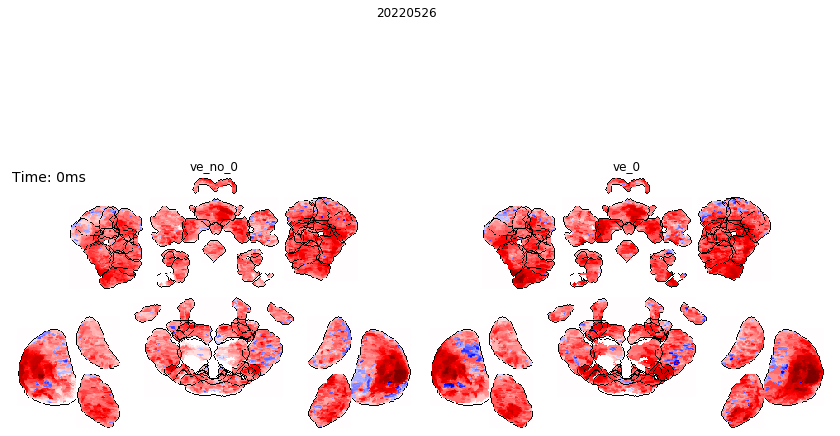

In [35]:
fig = plt.figure(figsize=(14.8,10))
tp=11
plot_panel('ve_no_0', tp, 1)
plt.text(5,30,'Time: {}ms'.format(neural_bins[tp]),fontsize=14,color='k')
#plot_panel('ve_no_180', tp, 2)
plot_panel('ve_0', tp, 2)
#plot_panel('ve_180', tp, 4)
plt.subplots_adjust(hspace=0,wspace=0)
plt.suptitle(f'20220526',y=.9)

In [20]:
for tp in range(len(neural_bins)-1):
    print(tp)
    fig = plt.figure(figsize=(14.8,10))

    plot_panel('ve_no_0', tp, 1)
    plt.text(5,30,'Time: {}ms'.format(neural_bins[tp]),fontsize=14,color='k')
    #plot_panel('ve_no_180', tp, 2)
    plot_panel('ve_0', tp, 2)
    #plot_panel('ve_180', tp, 4)
    plt.subplots_adjust(hspace=0,wspace=0)
    plt.suptitle(f'20220526',y=.9)


#     cax = fig.add_axes([0.47, 0.66, 0.01, 0.2])
#     cmap = matplotlib.cm.hot
#     norm = matplotlib.colors.Normalize(vmin=0, vmax=vmax)
#     cb = matplotlib.colorbar.ColorbarBase(ax=cax, cmap=cmap,
#                                     norm=norm,
#                                     orientation='vertical')

#     cb.ax.yaxis.set_tick_params(color='k')
#     plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='k',fontsize=12);
#     cb.outline.set_edgecolor('white')
    
    save_path = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs/20220613_movie'
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    fname = os.path.join(save_path, '{0:05d}.png'.format(tp))
    plt.savefig(fname,dpi=300,bbox_inches='tight')
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
